In [11]:
import sys
import os

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import nltk


In [13]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [14]:
df.drop("Unnamed: 0", axis = 1)
df.dropna(inplace = True)

In [15]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [16]:
#removing other than alphates and digits
import re
df['title'] = df['title'].str.replace(r"[^\w\s]", "").str.replace(r"\d", "")
df['text'] = df['text'].str.replace(r"[^\w\s]","").str.replace(r"\d", "")
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# nltk.download('stopwords')
# nltk.download('punkt')

# Function to tokenize and remove stopwords from text
def tokenize_and_remove_stopwords(text):
    # Convert the text to lowercase to ensure consistency
    text = text.lower()

    # Get the set of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords from the list of tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Reconstruct the text by joining the remaining tokens
    filtered_text = " ".join(filtered_tokens)

    return filtered_text

In [18]:
import nltk
# nltk.download('punkt_tab')
df['title'] = df['title'].apply(tokenize_and_remove_stopwords)
df['text'] = df['text'].apply(tokenize_and_remove_stopwords)

In [21]:
df.head()

,Unnamed: 0,title,text,label
0,0,law enforcement high alert following threats c...,comment expected barack obama members # fyf911...,1
2,2,unbelievable ! obama ’ attorney general says c...,", demonstrators gathered last night exercising...",1
3,3,"bobby jindal , raised hindu , uses story chris...",dozen politically active pastors came private ...,0
4,4,satan 2 : russia unvelis image terrifying new ...,"rs-28 sarmat missile , dubbed satan 2 , replac...",1
5,5,time ! christian group sues amazon splc design...,say one time someone sued southern poverty law...,1


In [22]:
X = df['title'] + df['text']
y = df['label']

# using tf-idf

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 1000)
tf_idf_matrix_h = tfidf.fit_transform(df['title'])
tf_idf_matrix_text = tfidf.fit_transform(df['text'])
title = tf_idf_matrix_h.toarray()
text = tf_idf_matrix_text.toarray()

In [29]:
a = []
for i in title:
    a.append(i)
print(a[1])
df['tf_title'] = a

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.3520546
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [31]:
b = []
for i in text:
    b.append(i)
print(b[1])
df['tf_text'] = b

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [32]:
df['label'].shape

(71537,)

In [37]:
import numpy as np
title = np.vstack(df['tf_title'].values)
text = np.vstack(df['tf_text'].values)
X = np.concatenate((title,text),axis = 1)
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [38]:
print(y.shape)

(71537,)


In [39]:
y_train.shape

(57229,)

In [40]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model_lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [41]:
y_pred = model_lr.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.963307240704501
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6907
           1       0.97      0.96      0.96      7401

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



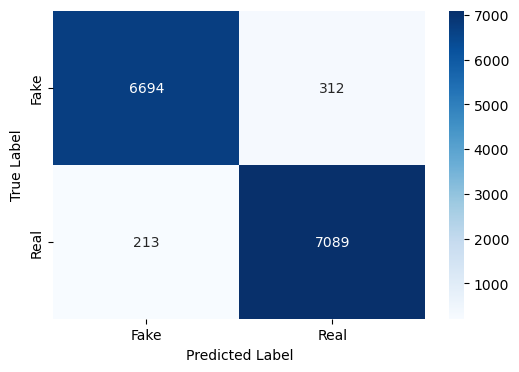

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p=2)
model_knn.fit(X_train,y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [44]:
y_pred = model_knn.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.7738328207995527
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      5464
           1       0.88      0.73      0.80      8844

    accuracy                           0.77     14308
   macro avg       0.77      0.79      0.77     14308
weighted avg       0.80      0.77      0.78     14308



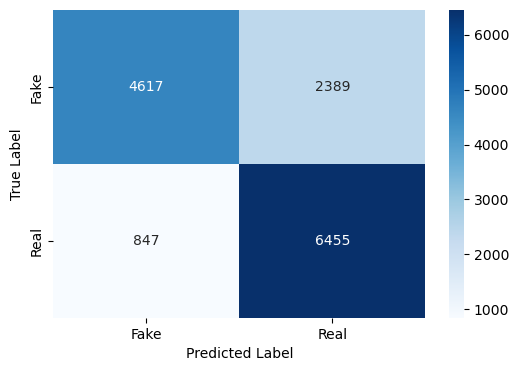

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
from sklearn.svm import SVC
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [47]:
y_pred = model_svm.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9649147330164942
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6920
           1       0.97      0.96      0.97      7388

    accuracy                           0.96     14308
   macro avg       0.96      0.97      0.96     14308
weighted avg       0.96      0.96      0.96     14308



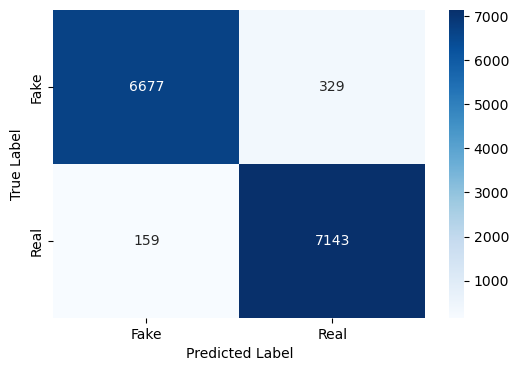

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show() 

In [55]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.8568632932625104
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7122
           1       0.85      0.87      0.86      7186

    accuracy                           0.86     14308
   macro avg       0.86      0.86      0.86     14308
weighted avg       0.86      0.86      0.86     14308



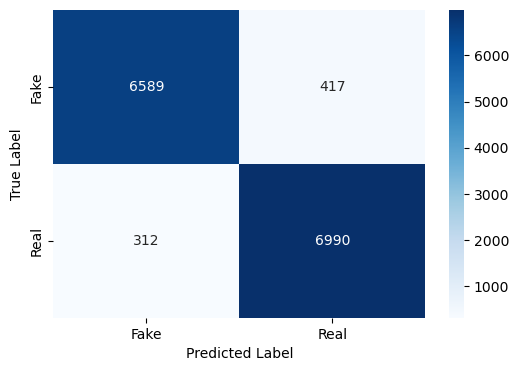

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)


In [59]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9490494828068213
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6901
           1       0.96      0.94      0.95      7407

    accuracy                           0.95     14308
   macro avg       0.95      0.95      0.95     14308
weighted avg       0.95      0.95      0.95     14308



Text(45.722222222222214, 0.5, 'True Label')

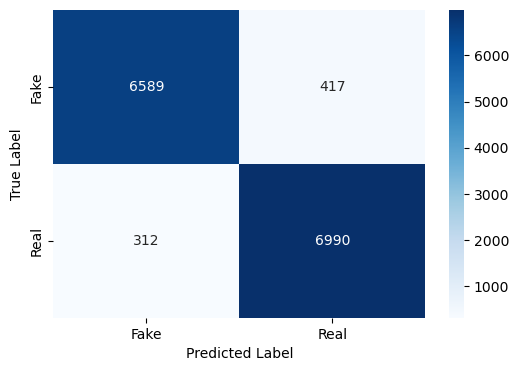

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Ensembling algorithms


In [61]:

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
#model_rf = RandomForsetClassifier(n_estimators = 100, random_state = 42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9658932065977076
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6836
           1       0.98      0.96      0.97      7472

    accuracy                           0.97     14308
   macro avg       0.97      0.97      0.97     14308
weighted avg       0.97      0.97      0.97     14308



Text(45.722222222222214, 0.5, 'True Label')

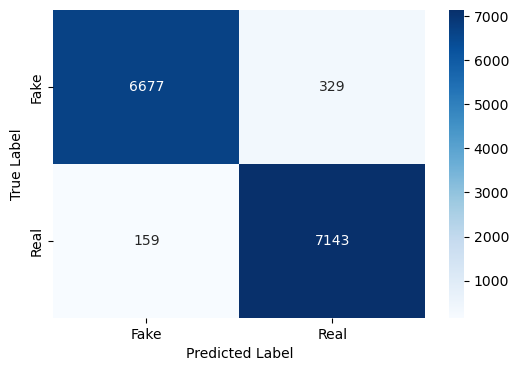

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [63]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective = 'binary:logistic',
                             n_estimators = 50,
                             max_depth =3 ,
                             learning_rate = 0.1,
                             random_state = 42)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9412216941571149
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6471
           1       0.98      0.91      0.94      7837

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308



Text(45.722222222222214, 0.5, 'True Label')

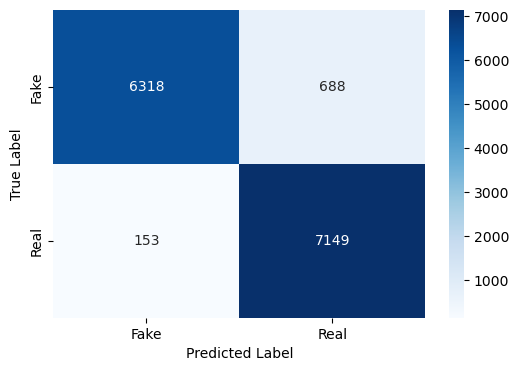

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [65]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth = 3)
model_ad = AdaBoostClassifier(estimator = base_estimator, n_estimators = 50, random_state = 42 )
model_ad.fit(X_train, y_train)
y_pred = model_ad.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9585546547386078
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6893
           1       0.97      0.95      0.96      7415

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



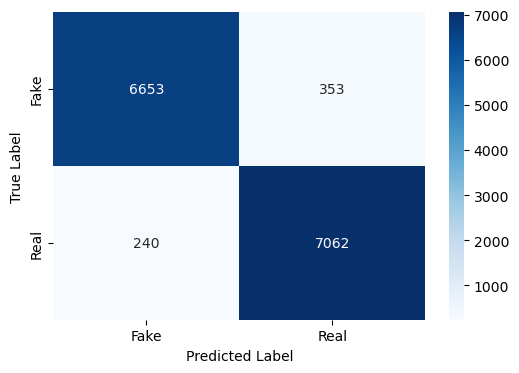

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

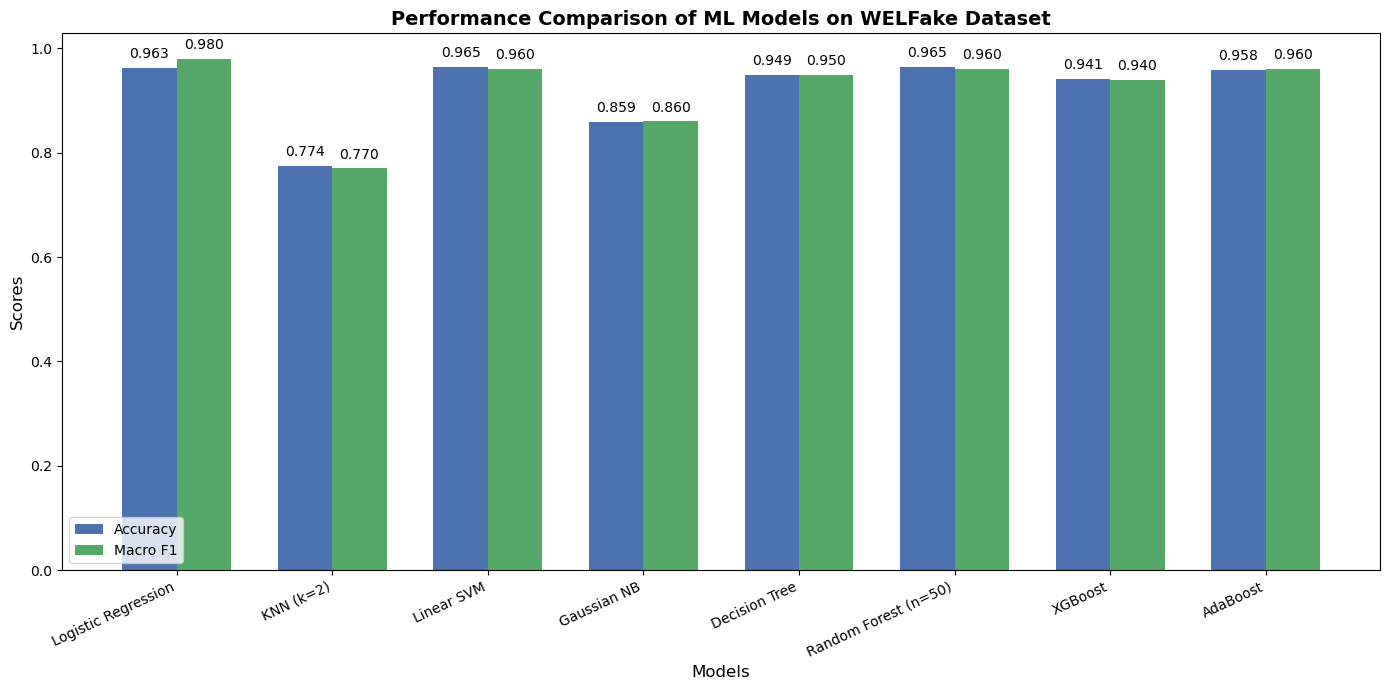

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics from your table
models = [
    'Logistic Regression', 'KNN (k=2)', 'Linear SVM', 'Gaussian NB',
    'Decision Tree', 'Random Forest (n=50)', 'XGBoost', 'AdaBoost'
]

accuracy = [0.963, 0.774, 0.965, 0.859, 0.949, 0.965, 0.941, 0.958]
macro_f1 = [0.98, 0.77, 0.96, 0.86, 0.95, 0.96, 0.94, 0.96]

x = np.arange(len(models))
width = 0.35  # width of bars

# Create figure
plt.figure(figsize=(14, 7))
ax = plt.gca()

# Bars
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='#4C72B0')
rects2 = ax.bar(x + width/2, macro_f1, width, label='Macro F1', color='#55A868')

# Labeling
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Performance Comparison of ML Models on WELFake Dataset", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25, ha='right')
ax.legend()


def add_labels(rectangles):
    for rect in rectangles:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=10)

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


SHAP EXPLAINABLE

In [70]:
import shap
shap.initjs()

In [71]:
background = shap.sample(X_train, 200, random_state=42)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine title and text into one field
combined_text = df['title'] + " " + df['text']

# Create vectorizer
tfidf = TfidfVectorizer(max_features=2000)

# TF-IDF features
X = tfidf.fit_transform(combined_text).toarray()
y = df['label']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature names for SHAP
feature_names = tfidf.get_feature_names_out()


In [73]:
# Use SHAP Explainer for linear models
explainer_lr = shap.Explainer(model_lr, X_train, feature_names=feature_names)

# SHAP values for test set
shap_values_lr = explainer_lr(X_test)

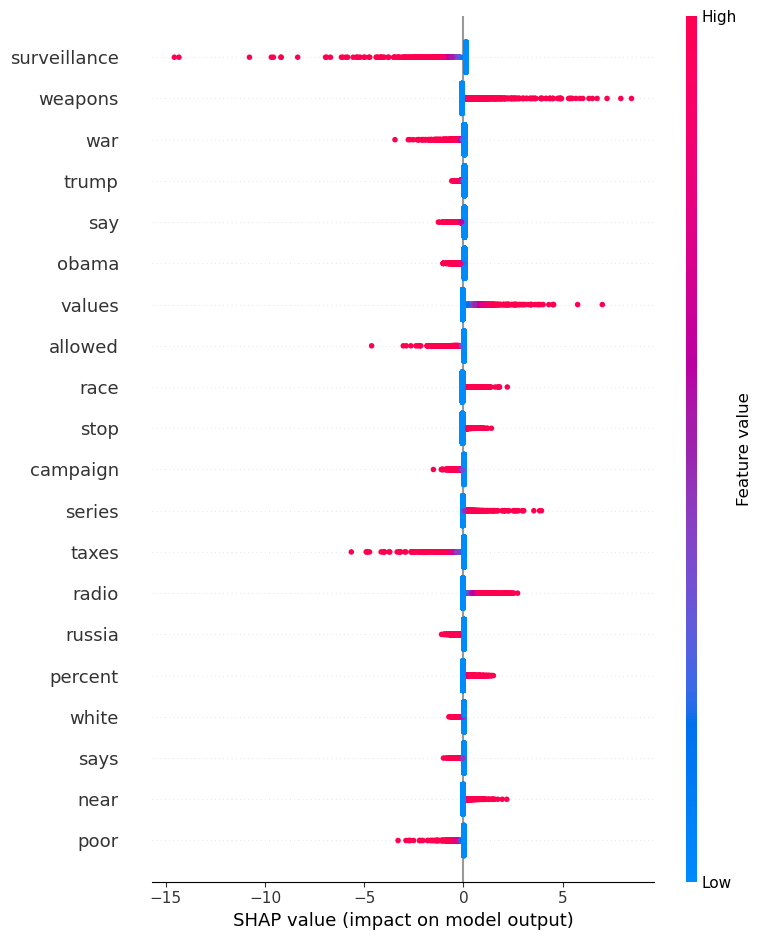

In [75]:
shap.summary_plot(
    shap_values_lr,
    X_test,
    feature_names=feature_names,
    plot_type="dot",
    max_display=20
)


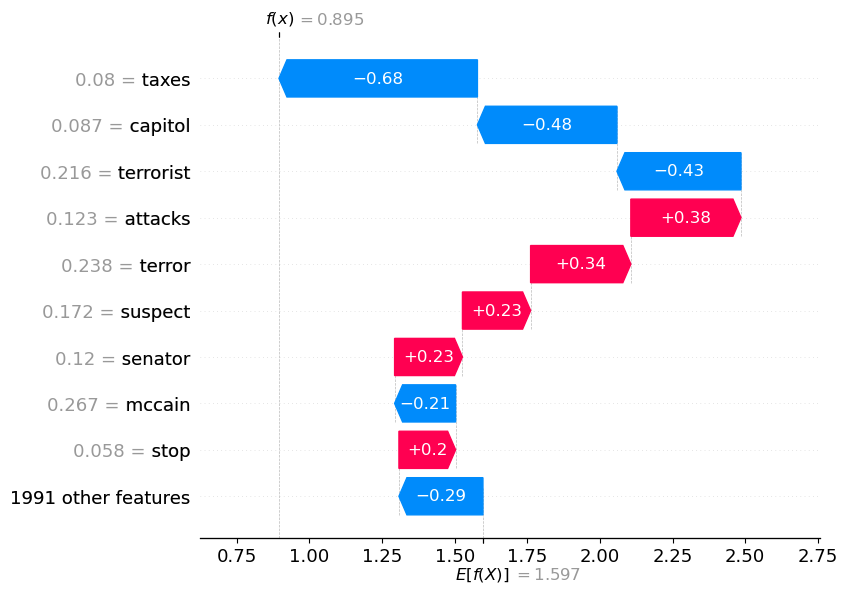

In [ ]:
idx = 10  # choose any test sample

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_lr.values[idx],
        base_values=shap_values_lr.base_values[idx],
        data=X_test[idx],
        feature_names=feature_names
    )
)


Random Forest


In [ ]:
explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(X_test)

In [ ]:
shap.summary_plot(
    shap_values_rf[1],   # class 1 = fake
    X_test,
    feature_names=feature_names,
    plot_type="dot",
    max_display=20
)


In [ ]:
shap.summary_plot(
    shap_values_rf[1],
    X_test,
    feature_names=feature_names,
    plot_type="bar",
    max_display=20
)


In [ ]:
idx = 10

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_rf[1][idx],
        base_values=explainer_rf.expected_value[1],
        data=X_test[idx],
        feature_names=feature_names
    )
)


XGBoost

In [ ]:
explainer_xgb = shap.TreeExplainer(model_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)


In [ ]:
shap.summary_plot(
    shap_values_xgb,
    X_test,
    feature_names=feature_names,
    plot_type="dot",
    max_display=20
)


In [ ]:
shap.summary_plot(
    shap_values_xgb,
    X_test,
    feature_names=feature_names,
    plot_type="bar",
    max_display=20
)


In [ ]:
idx = 10

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_xgb[idx],
        base_values=explainer_xgb.expected_value,
        data=X_test[idx],
        feature_names=feature_names
    )
)
